# Solve Titanic ML problem

In [1]:
import graphlab
import pandas as pd
import numpy

# Explore dataset 

In [2]:
df = pd.read_csv('data/train.csv')
df2 = graphlab.SFrame('data/train.csv') #see how graphlab parsed the file 

This non-commercial license of GraphLab Create for academic use is assigned to jlee12@ncsu.edu and will expire on February 02, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\John\AppData\Local\Temp\graphlab_server_1519516150.log.0


Finished parsing file C:\Users\John\Desktop\side_project\data\train.csv

Parsing completed. Parsed 100 lines in 0.040029 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,long,str,str,float,long,long,str,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\John\Desktop\side_project\data\train.csv

Parsing completed. Parsed 891 lines in 0.034022 secs.

In [3]:
#See the structure of the data
print df.shape
print df.count()

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


# Caution: There exist some missing data in Age, Cabin, Embarked


In [4]:
#treat the missign values and turn the categorical values to numerical
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
#replace all missing values in Fare and Age with median    
    data.loc[data['Sex'] == "male", "Sex"] = 0
    data.loc[data['Sex'] == "female", "Sex"] = 1
#replace male to 0, female to 1 
    data['Embarked'] = data['Embarked'].fillna("S")
    data.loc[data['Embarked'] == "S", "Embarked"] = 0
    data.loc[data['Embarked'] == "C", "Embarked"] = 1
    data.loc[data['Embarked'] == "Q", "Embarked"] = 2
#replace all missing values in Embarked with S, 
#replace S to 0, C to 1, Q to 2 

#Why transform categorical values to numerical
#A lot of ML algorithms are basically number crunching algorithms so they don't do
#well with the categorical values

In [6]:
clean_data(df)

# Take a closer look at data

In [7]:
#import module for visualization
import matplotlib.pyplot as plt
%matplotlib inline

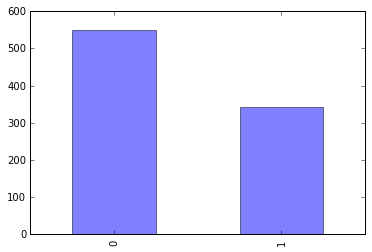

In [9]:
df.Survived.value_counts().plot(kind='bar', alpha=0.5)
#about 350 survived, 550 died

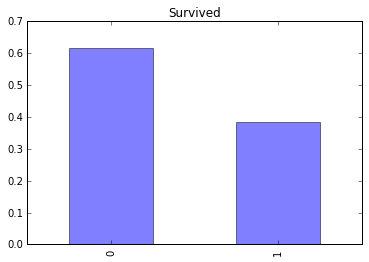

In [10]:
#Normalize the counts
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Survived")
#40% survived, 60% died

# Let's look at the relationship of age and survival rate 

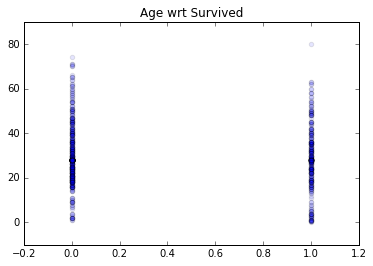

In [11]:
plt.title("Age wrt Survived")
plt.scatter(df.Survived, df.Age, alpha=0.1)
#Age doesn't seem to be a strong differentiator 

# Let's look at passenger class

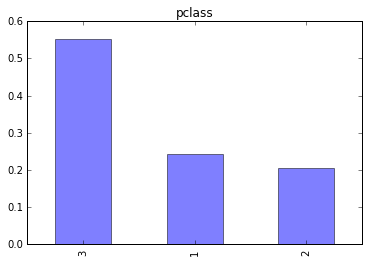

In [12]:
df.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("pclass")
#55% in 3rd class, 25% 1st, 20% 2nd class

# passenger class wrt age

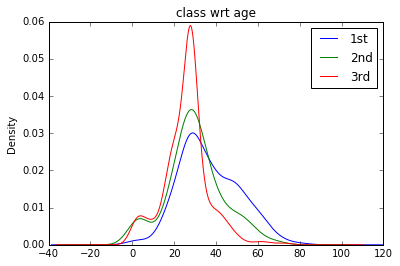

In [13]:
#For fun, let's see if age has anything to do with Pclass. Hypothesis:"older the richer"
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind='kde') #Kernel Density Estimation
plt.title("class wrt age")
plt.legend(("1st","2nd","3rd"))
#Age of 1st class is older than 2nd or 3rd
#good way to make sense of information 

# Where the passenger embarked

In [14]:
df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

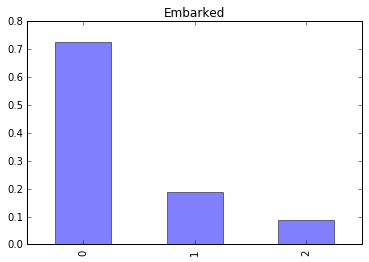

In [15]:
df.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Embarked")
#S; South Hampton;England 
#C; France

# Gender effect to survival

In [29]:
df.Survived[df.Sex == 0].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

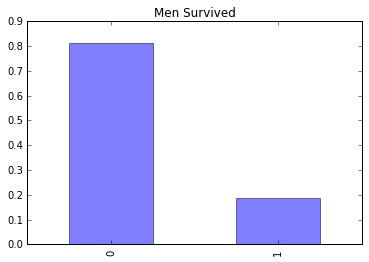

In [26]:
df.Survived[df.Sex == 0].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Men Survived')
#18.8% men survived 

In [31]:
df.Survived[df.Sex == 1].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

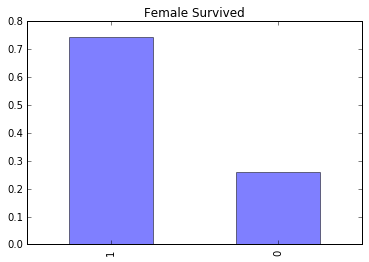

In [30]:
df.Survived[df.Sex == 1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Female Survived')
#74.2% women survived

# Of those survived, 68% are female, 31% are male

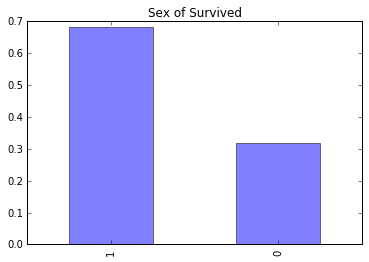

In [37]:
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('Sex of Survived')
#Female survival rate is much higher than male
#***Very important information***

# Use Passenger Class to show survival rate

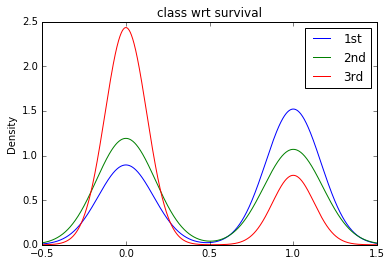

In [38]:
#Let's see if richer people survived more
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind='kde') #Kernel Density Estimation
plt.title("class wrt survival")
plt.legend(("1st","2nd","3rd"))

# 1st class survived more than 3rd class. 2nd class is about the same

# What if you look at the Pclass & gender together?

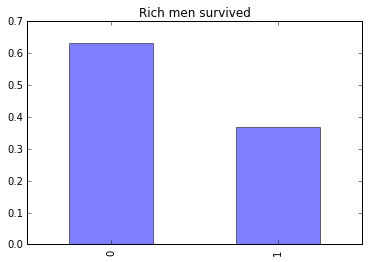

In [39]:
#Rich men 
df.Survived[(df.Sex == 0) & (df.Pclass == 1)].value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title("Rich men survived")
#about 40% of rich men survived

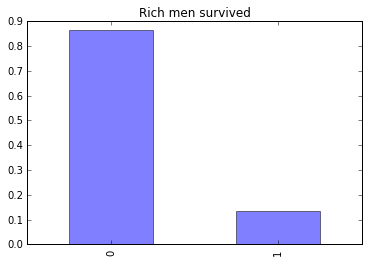

In [41]:
#Poor men
df.Survived[(df.Sex == 0) & (df.Pclass == 3)].value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title("Rich men survived")
#about 10% of poor men survived

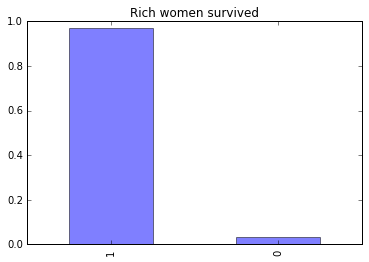

In [42]:
df.Survived[(df.Sex == 1) & (df.Pclass == 1)].value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title("Rich women survived")
#almost 97% rich women survived
#in the data there are 94 rich women, and only 3 of them died

In [48]:
df.Survived[(df.Sex == 1) & (df.Pclass == 1)].value_counts()

1    91
0     3
Name: Survived, dtype: int64

# Let's do some prediction with algorithms 

In [54]:
train = pd.read_csv('data/train.csv')

#loc method: pass a condition for columns to be updated


# Start very simple: Hypothesis: "If female, then survived"

In [55]:
clean_data(train)

In [58]:
#if the sex is female then update Hyp column with 1 
train["Hyp"] = 0
train.loc[train.Sex == 'female', 'Hyp'] = 1

In [59]:
#if survived column is same as Hyp, then update the new column 'result' with 1
train['Result'] = 0 
train.loc[train.Survived == train["Hyp"], "Result"] = 1

In [60]:
#compare my hypothesis with actual recorded value 
train['Result'].value_counts()
#1 means hypothesis met recorded value

1    549
0    342
Name: Result, dtype: int64

In [61]:
train['Result'].value_counts(normalize=True)

1    0.616162
0    0.383838
Name: Result, dtype: float64

# Very simple insight to the data brought significant result. Prediction accuracy is 61% (with train set)

# Now, try using logistic regression 

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
#Set the desired output as target
target = train['Survived'].values

In [64]:
#Set the features that you think are relevant 
#These are the hints 
feature_names = ['Pclass','Age','Sex','SibSp','Parch']
features = train[feature_names].values

In [65]:
classifier = LogisticRegression()
classifier_ = classifier.fit(features, target)
#.fit classifier go through every row of data and 
#tries to find hidden relationship of the data

In [66]:
#calculate model accuracy 
#If we add more features, model will do better
#however, problem of overfitting 
classifier_.score(features, target)

0.79349046015712688

# Maybe our data could be described better with the 2nd degree polynomial (curve)

In [67]:
from sklearn import preprocessing

In [68]:
poly = preprocessing.PolynomialFeatures(degree = 2)
poly_features = poly.fit_transform(features)
#Transform our linear features to second dgree poly

In [69]:
classifier_ = classifier.fit(poly_features, target)

In [70]:
classifier_.score(poly_features, target)
#using the polynomial features looks like a pretty 
#significant win 
#BUT unfortunately, there are biases in algorithms 

0.83164983164983164

# How to deal with biases of models
# How to protect predictions from biases

# Decision Tree

In [71]:
from sklearn import tree

In [72]:
decision_tree = tree.DecisionTreeClassifier(random_state=1)
#Initialize your decision tree with random value
#If you don't set it up, and start from 0 
#optimization algorithm struggles because
#they will do derivatives to improve situations

In [73]:
decision_tree_ = decision_tree.fit(features, target)

In [74]:
decision_tree.score(features, target)
#model is overfitting 

0.91694725028058366

# model selection 
#There are techniques that limit overfitting

#Playing hide and seek with models

#You will intenionally withdraw some information

In [75]:
from sklearn import tree, model_selection

# cross validation score function
When you withdraw information from algorithm, the part of data 
you are hiding from algorithm, is called cross validation set
Caution: It's not always true.

In [76]:
scores = model_selection.cross_val_score(decision_tree,
                                        features, target,
                                        scoring=
                                        'accuracy', cv=50)

In [77]:
scores.mean()

0.80161764705882343

# Create generalized decision tree

In [80]:
generalized_tree = tree.DecisionTreeClassifier(
    random_state=1,
    max_depth = 7,
    min_samples_split = 2)


In [81]:
generalized_tree_ = generalized_tree.fit(features, target)

In [82]:
generalized_tree.score(features, target)


0.85297418630751964

In [83]:
scores = model_selection.cross_val_score(generalized_tree,
                                        features, target,
                                        scoring=
                                        'accuracy', cv=50)

In [84]:
scores.mean()

0.80390522875816994

# Generalized version of tree is less confident than the first one (decision tree)
# But can give you better score when run correctly 

In [86]:
#Like shown above, it's hard to see what machine is thinking
#luckly, in ML there's a useful tool, especially in decision trees
#which will allow you to visualize the trees
tree.export_graphviz(generalized_tree_, feature_names=feature_names,
                    out_file="tree.dot")

# In our basic simple model, we said Sex is the important variable and decision tree understood that.